<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment_1_regression_aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing and importing packages

In [111]:
!pip install ucimlrepo;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_squared_error;
from sklearn.model_selection import train_test_split;

###Loading the data

In [112]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

###Data cleaning and exploratory data analysis

In [113]:
#Taking a look at the data
pd.set_option('display.max_columns', None);
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [114]:
# Checking number of features and instances
X.shape

(1020, 33)

In [177]:
#Checking the dimensions of y
y.shape

(1017,)

In [124]:
#Only need aveoralm
y = y['aveOralM']

In [115]:
# Checking data types
# gender, age, and ethnicity are listed as objects so they may have different types or contain nan values
X.dtypes

,0
Gender,object
Age,object
Ethnicity,object
T_atm,float64
Humidity,float64
Distance,float64
T_offset1,float64
Max1R13_1,float64
Max1L13_1,float64
aveAllR13_1,float64


In [116]:
# Computing descriptive statistics for numerical data
# It seems that distance is missing two values
# Distance also seems to have a very big outlier
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,35.547315,35.689762,35.640851,35.610869,35.468624,35.670962,35.253563,35.208961,35.787509,35.758025,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,0.568828,0.553594,0.541169,0.545645,0.566434,0.540748,0.605968,0.584393,0.533453,0.533313,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,33.932500,34.002500,34.105000,34.105000,33.730000,34.122500,33.617500,33.385000,34.375000,34.352500,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,35.210000,35.360000,35.309375,35.278750,35.127500,35.331875,34.886250,34.863750,35.455000,35.426875,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,35.482500,35.631250,35.597500,35.572500,35.425000,35.626250,35.203750,35.167500,35.713750,35.686250,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,35.808125,35.940625,35.895000,35.863125,35.755000,35.922500,35.562500,35.498125,36.030625,36.002500,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,38.330000,38.407500,38.042500,38.037500,37.960000,38.075000,38.155000,37.827500,38.407500,38.382500,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [117]:
# Checking value counts for categorical variables
# Mostly young people in this dataset. Results may not generalize to older populations
X['Age'].value_counts()

,count
Age,
18-20,534
21-25,355
26-30,67
31-40,31
51-60,11
21-30,10
41-50,9
>60,3


In [118]:
# Mostly white people in this dataset. Results may not generalize to other ethnicities
X['Ethnicity'].value_counts()

,count
Ethnicity,
White,506
Asian,260
Black or African-American,143
Hispanic/Latino,57
Multiracial,50
American Indian or Alaskan Native,4


In [119]:
# This looks relatively balanced
X['Gender'].value_counts()

,count
Gender,
Female,606
Male,414


In [121]:
# Checking for nan values
# As observed previously, distance has two missing values
X.isna().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


In [122]:
# Finding the rows with nan values
X[X['Distance'].isna()]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
902,Female,18-20,White,23.9,15.3,NaN,0.8100,35.735,35.4150,35.0525,34.6275,35.7000,35.7000,35.5200,35.7350,35.4450,35.4100,35.290,35.460,35.3150,35.010,35.735,35.6975,34.5750,34.73,34.675,34.7075,34.77,35.3900,35.1925,36.0075,35.8675,35.895
903,Male,18-20,White,23.9,15.3,NaN,0.7775,35.620,35.6275,34.3650,33.8125,35.6675,35.5975,35.5925,35.7025,35.6425,35.5975,35.505,35.685,35.3475,35.295,35.725,35.6950,33.4375,33.59,33.840,33.1125,33.35,34.8675,34.4825,36.3350,36.0425,36.080


In [125]:
#removing nan values
X = X.drop(index=[902, 903])
y = y.drop(index=[902, 903])

In [126]:
#Checking out the distribution of y
y.describe()

,aveOralM
count,1018.000000
mean,37.028163
std,0.509743
min,35.540000
25%,36.752500
50%,36.940000
75%,37.140000
max,40.340000


<Axes: >

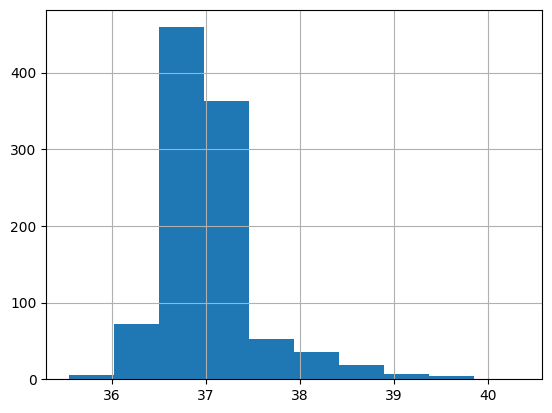

In [127]:
# Looks slightly right skewed
y.hist()

In [128]:
# Removing outlier in distance column
X[X['Distance'] > 2]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
97,Female,41-50,White,25.8,31.5,79.0,1.3075,35.2125,35.265,33.7725,33.975,35.51,35.21,35.5,35.54,35.29,35.29,35.125,35.3225,34.78,34.755,35.54,35.51,34.265,34.475,34.4875,34.095,34.3525,35.1125,34.9425,36.2425,36.08,36.1225


In [129]:
X = X.drop(index=97)
y = y.drop(index=97)

array([[<Axes: title={'center': 'T_atm'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'T_offset1'}>,
        <Axes: title={'center': 'Max1R13_1'}>],
       [<Axes: title={'center': 'Max1L13_1'}>,
        <Axes: title={'center': 'aveAllR13_1'}>,
        <Axes: title={'center': 'aveAllL13_1'}>,
        <Axes: title={'center': 'T_RC1'}>,
        <Axes: title={'center': 'T_RC_Dry1'}>],
       [<Axes: title={'center': 'T_RC_Wet1'}>,
        <Axes: title={'center': 'T_RC_Max1'}>,
        <Axes: title={'center': 'T_LC1'}>,
        <Axes: title={'center': 'T_LC_Dry1'}>,
        <Axes: title={'center': 'T_LC_Wet1'}>],
       [<Axes: title={'center': 'T_LC_Max1'}>,
        <Axes: title={'center': 'RCC1'}>,
        <Axes: title={'center': 'LCC1'}>,
        <Axes: title={'center': 'canthiMax1'}>,
        <Axes: title={'center': 'canthi4Max1'}>],
       [<Axes: title={'center': 'T_FHCC1'}>,
        <Axes: title={'cente

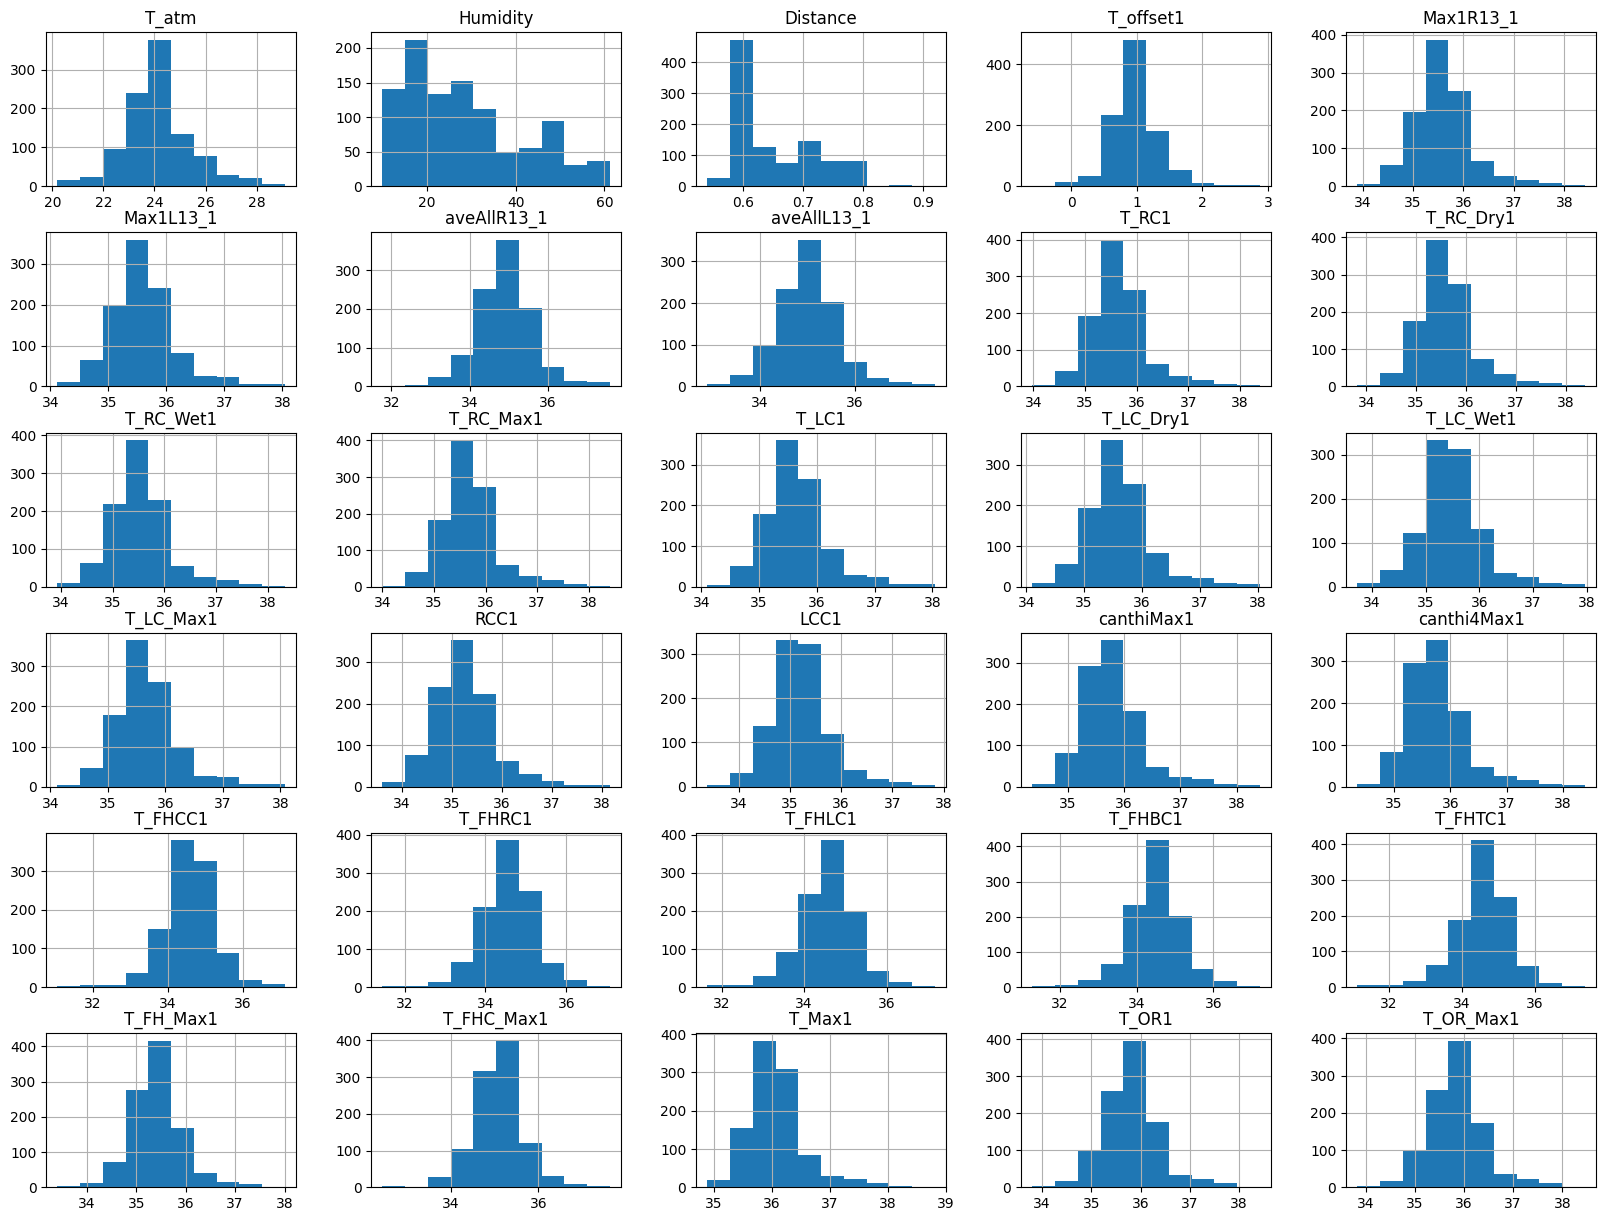

In [130]:
# Checking out X distributions
X.hist(figsize=(20,15))

<Axes: xlabel='Age', ylabel='aveOralM'>

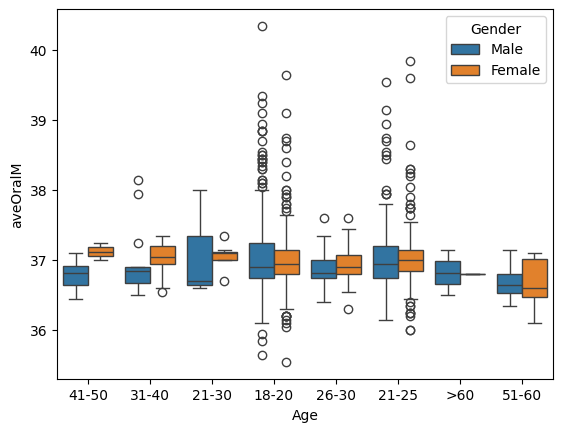

In [131]:
sns.boxplot(x=X['Age'], y=y, hue=X['Gender'])

<Axes: xlabel='Ethnicity', ylabel='aveOralM'>

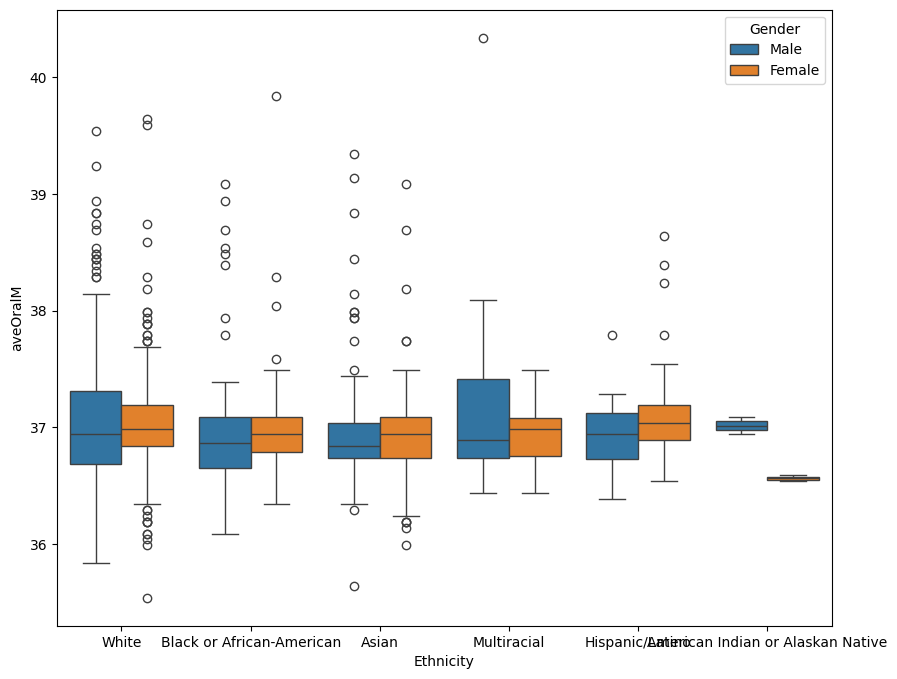

In [132]:
plt.figure(figsize=(10,8))
sns.boxplot(x=X['Ethnicity'], y=y, hue=X['Gender'])

<Axes: >

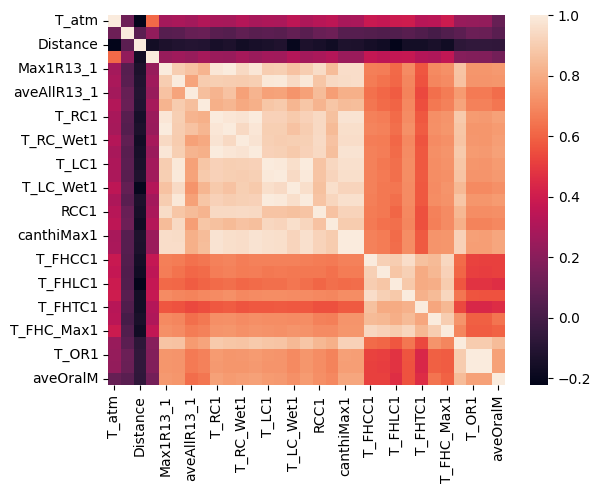

In [133]:
numerical = X.select_dtypes(include=np.number)
numerical['aveOralM'] = y
sns.heatmap(numerical.corr())

In [134]:
# One hot encoding
X = pd.get_dummies(X, drop_first=True)

#Find all boolean columns
boolean_columns = X.select_dtypes(include=['bool']).columns

#Create a dictionary to map boolean columns to int
conversion_dict = {col: 'int' for col in boolean_columns}

#Convert the boolean columns to integers
X = X.astype(conversion_dict)


###Initializing the model

In [172]:
class LinearRegression:
  def __init__(self, add_bias=True):
    self.add_bias = add_bias
    pass

  def fit(self, x, y):
    if x.ndim == 1:                               # Converting to 2D array if input is 1D array
      x = x[:, None]
    N = x.shape[0]
    if self.add_bias:                             # Adding a column of ones to X to account for the bias term if necessary
      x = np.column_stack((x, np.ones(N)))
    self.w = np.linalg.lstsq(x, y, rcond=None)[0]
    return self

  def predict(self, x):
    if x.ndim == 1:
      x = x[:, None]
    N = x.shape[0]
    if self.add_bias:
      x = np.column_stack((x, np.ones(N)))
    yh = x @ self.w
    return yh

### Fitting the model to our data

In [136]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Training the model
model = LinearRegression()
model.fit(x_train, y_train);

In [138]:
yh = model.predict(x_test)

### Assessing model performance

In [162]:
# Calculating RMSE
mean_squared_error(y_test, yh, squared=False)  # squared=False gives RMSE

0.2549933612054675

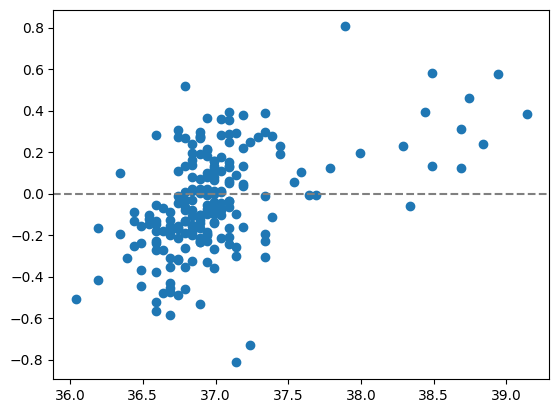

In [165]:
# calculating residuals
residuals = y_test - yh

# interestingly, our model tends to underestimate temperature when someone has a fever

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='gray', linestyle='--')

<Axes: xlabel='aveOralM'>

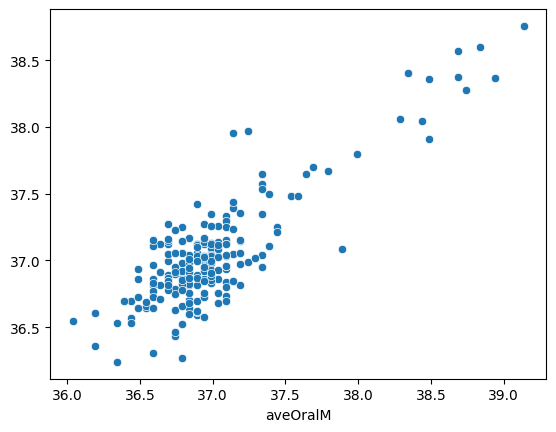

In [158]:
# Create a correlation plot
sns.scatterplot(x=y_test, y=yh)

In [161]:
# Calculate variance explained and correlation coefficient
r2 = r2_score(y_test, yh)
print(f"variance explained: {r2}\npearson correlation: {r2 ** 0.5}")

variance explained: 0.7237822568497811
pearson correlation: 0.8507539343722021


### Questions to ask
* Are the metrics used to evaluate the model good?
* Should I include more exploratory data analysis. If yes, what?
* Is it okay that I used sklearn metrics heavily?
* Is it okay to use np.linalg.lstsq? Or do we have to do the matrix multiplication?

Review and compare with classmates